## Import neccessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.float_format',lambda x: '%.3f' %x)

## Data Reading and Sampling

### Let's read our nyc cab fare training data into memmory

In [2]:
df = pd.read_csv('sample_abc.csv')

### Let's look at the top 2 observations of the data to get an idea of the dataset values and schema

In [3]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2013-09-05 06:48:00.00000016,34.830,2013-09-05 06:48:00 UTC,-73.974,40.792,-73.862,40.768,2
1,2015-03-14 14:50:48.0000001,22.500,2015-03-14 14:50:48 UTC,-73.977,40.723,-73.956,40.781,1


### Let's see how many total observations are present in this dataset (in Millions)

In [8]:
print(str(round(df.shape[0]/1000000.0,2)) + " Million Rows")

0.1 Million Rows


### Let's describe the full dataset

In [6]:
df.describe(include='all')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000,100000.000,100000,100000.000,100000.000,100000.000,100000.000,100000.000
unique,100000,nan,99111,nan,nan,nan,nan,nan
top,2014-06-14 16:32:19.0000002,nan,2012-09-18 19:44:00 UTC,nan,nan,nan,nan,nan
freq,1,nan,3,nan,nan,nan,nan,nan
mean,NaN,11.392,NaN,-72.554,39.911,-72.570,39.912,1.689
std,NaN,9.909,NaN,13.007,9.269,13.481,9.189,1.312
min,NaN,-12.500,NaN,-2260.699,-2154.295,-2260.699,-2154.295,0.000
25%,NaN,6.000,NaN,-73.992,40.735,-73.991,40.734,1.000
50%,NaN,8.500,NaN,-73.982,40.753,-73.980,40.753,1.000
75%,NaN,12.500,NaN,-73.967,40.767,-73.964,40.768,2.000


## Data Sampling

### Why to do data sampling ?

Data in it's current size is too big. Although we have a 24GB RAM but still current data of 55.42 Million rows (5GB+) is little high to work with. So let's take random sample of the data and work with that for the prototyping stage.

### How to Sample data in Pandas ?

In [9]:
df1 = df.sample(10000)
df1.to_csv('sample_csv.csv')

df = pd.read_csv('sample_csv.csv') 

## Alrighty, So let's start with Exploratory Data Analysis now.
There are three major steps in EDA
1. Data Understanding
2. Data Cleaning (Handling of Missing Values and Invalid Values)
3. Data Transformation and Manipulation (New feature creation and selection of the most important features using visualization and statistical analysis)

## Data Understanding

### Let's see what kind of data we have in the sample

In [10]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,48754,2015-02-12 22:19:03.00000013,10.000,2015-02-12 22:19:03 UTC,-73.986,40.758,-74.004,40.736,1
1,1022,2012-03-05 13:28:06.0000001,13.700,2012-03-05 13:28:06 UTC,-73.961,40.812,-73.985,40.768,2
2,26746,2014-10-11 10:32:00.00000031,7.500,2014-10-11 10:32:00 UTC,-73.980,40.759,-74.000,40.759,2
3,94738,2012-05-09 08:14:27.0000004,7.300,2012-05-09 08:14:27 UTC,-73.981,40.750,-74.001,40.758,1
4,80059,2012-11-01 02:18:50.0000003,12.000,2012-11-01 02:18:50 UTC,-74.010,40.712,-73.992,40.758,1


### Lets Describe the Sample Dataset

In [12]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,50096.807,11.473,-72.523,39.920,-72.559,39.941,1.695
std,29148.818,9.767,10.399,6.186,10.271,6.121,1.324
min,1.000,-4.500,-75.423,-73.993,-75.339,-74.006,0.000
25%,24714.000,6.100,-73.992,40.734,-73.991,40.735,1.000
50%,50385.500,8.500,-73.982,40.752,-73.980,40.753,1.000
75%,75659.750,12.675,-73.967,40.767,-73.964,40.768,2.000
max,99991.000,165.000,40.787,42.348,40.784,42.348,6.000


### Let's explore the passenger_count variable a little more

Let's see for each passenger_count how many trips are occurring

In [13]:
df['passenger_count'].value_counts()

1    6928
2    1426
5     746
3     442
4     213
6     211
0      34
Name: passenger_count, dtype: int64

We can see that there are some irregularities in these numbers as 
1. It's impossible to have 208 passengers in a cab trip. Unless cab is actually a train :P
2. It's also theoretically impossible to have 0 passengers in a cab trip.
3. Also 49,34,7,8 and 9 are very high and unusual numbers for the passenger count and their less frequency makes them more 
unusual
#### Conclusion - Based on the above three points remove all the trips from data where such values are observed

### Let's explore the fare_amount variable now

In [14]:
df['fare_amount'].describe()

count   10000.000
mean       11.473
std         9.767
min        -4.500
25%         6.100
50%         8.500
75%        12.675
max       165.000
Name: fare_amount, dtype: float64

We can directly see from the above numbers that there is some pecularities in this data as well. 
1. Fare can't be negative (-107.750 USD)
2. In NYC Fare can't be less than 2.5USD for any cab trip
3. Cab Fare of 93963.36 USD must be a data entry mistake or some kind of other technical issue.
#### Conclusion - Based on all of the above points remove all the trips from data where such values are observed

### Let's see how's the fare_amount between 2.5 USD and 100 USD distributed

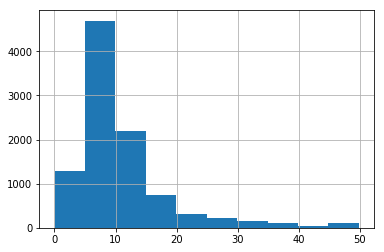

In [19]:
df[(df['fare_amount']>0) & (df['fare_amount']< 50)]['fare_amount'].hist()

### Let's explore this distribution granularly using bins

In [16]:
bins = [1,10,20,30,40,50,60,70,80,90,100,200,1000,10000]
pd.cut(df['fare_amount'],bins).value_counts()

(1, 10]          6129
(10, 20]         2823
(20, 30]          508
(30, 40]          251
(40, 50]          162
(50, 60]           99
(60, 70]           11
(70, 80]            6
(100, 200]          4
(80, 90]            4
(90, 100]           1
(1000, 10000]       0
(200, 1000]         0
Name: fare_amount, dtype: int64

In [21]:
bins = [1,10,20,30,40,50,60,70,80,90,100]
(pd.cut(df[df['passenger_count']==0]['fare_amount'],bins).value_counts())/len(df[df['passenger_count']== 0])

(1, 10]     0.765
(10, 20]    0.147
(20, 30]    0.059
(40, 50]    0.029
(90, 100]   0.000
(80, 90]    0.000
(70, 80]    0.000
(60, 70]    0.000
(50, 60]    0.000
(30, 40]    0.000
Name: fare_amount, dtype: float64

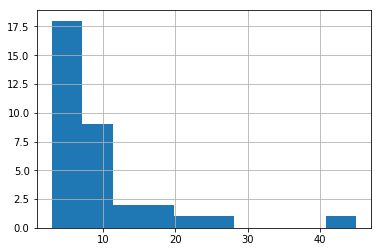

In [23]:
df[(df['passenger_count']==0) &(df['passenger_count']<20)]['fare_amount'].hist()

In [ ]:
# Should we use this data (Zero Passenger data) for our model building